In [1]:
#데이터를 다루기 위한 라이브러리
import pandas as pd
import numpy as np

#진행도 출력
from tqdm import tqdm

#경고 메시지 미노출(결과 도출에 큰 차이 없음)
import warnings
warnings.filterwarnings(action='ignore')

#설비 데이터 경로
file_path='datas/data.csv'
file_q = 'datas/quality.xlsx'

#설비 데이터 로드
df = pd.read_csv(file_path, encoding='cp949')

In [2]:
#그래프 관련 라이브러리 improt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import rc
import matplotlib.font_manager as fm

#그래프를 크게 보기 위한 설정
sns.set(rc={"figure.figsize": (15,8)})

#그래프에서 한글을 볼 수 있도록 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

font = fm.FontProperties(fname=font_path).get_name()

rc('font', family=font)

#음수 부호 미노출 오류 제거
mpl.rcParams['axes.unicode_minus'] =False

In [3]:
#data load확인
df.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,...,0.450421,NaN,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,...,0.450356,1.146260e-10,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,...,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,...,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,...,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [4]:
#데이터 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TAG_MIN            object 
 1   배정번호               int64  
 2   건조 1존 OP           float64
 3   건조 2존 OP           float64
 4   건조로 온도 1 Zone      float64
 5   건조로 온도 2 Zone      float64
 6   세정기                float64
 7   소입1존 OP            float64
 8   소입2존 OP            float64
 9   소입3존 OP            float64
 10  소입4존 OP            float64
 11  소입로 CP 값           float64
 12  소입로 CP 모니터 값       float64
 13  소입로 온도 1 Zone      float64
 14  소입로 온도 2 Zone      float64
 15  소입로 온도 3 Zone      float64
 16  소입로 온도 4 Zone      float64
 17  솔트 컨베이어 온도 1 Zone  float64
 18  솔트 컨베이어 온도 2 Zone  float64
 19  솔트조 온도 1 Zone      float64
 20  솔트조 온도 2 Zone      float64
dtypes: float64(19), int64(1), object(1)
memory usage: 471.0+ MB


In [5]:
#object -> datetime으로 변경
df['TAG_MIN'] =pd.to_datetime(df.TAG_MIN, format='%Y-%m-%d')

In [6]:
#data 기술통계 확인
df.describe()

,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
count,2.939722e+06,2.939721e+06,2.939721e+06,2.939606e+06,2.939574e+06,2.939631e+06,2.935434e+06,2.939722e+06,2.939720e+06,2.939719e+06,2.939721e+06,2.939575e+06,2.939592e+06,2.939594e+06,2.939565e+06,2.939552e+06,2.939616e+06,2.939580e+06,2.939513e+06,2.939519e+06
mean,1.284422e+05,6.989404e+01,2.044708e+01,1.000061e+02,1.000198e+02,6.771864e+01,7.564373e+01,5.486239e+01,5.386029e+01,7.108925e+01,4.488618e-01,1.145580e-10,8.592077e+02,8.600021e+02,8.600029e+02,8.600062e+02,2.839963e+02,2.799293e+02,3.318062e+02,3.321773e+02
std,1.263704e+04,4.014802e+00,5.217123e+00,4.360371e-01,3.623526e-01,1.630768e+00,2.516083e+01,4.429079e+00,2.664304e+00,2.556959e+00,1.886477e-02,6.012797e-13,3.647667e+00,5.578480e-01,3.518205e-01,4.551778e-01,9.512770e+00,6.611579e+00,7.827379e-01,8.732977e-01
min,1.024100e+05,4.725320e+01,1.188830e-04,9.734210e+01,9.787060e+01,6.062440e+01,8.500550e-04,8.620010e+00,4.370450e-02,6.244200e-03,5.096370e-03,1.116620e-10,8.402980e+02,8.559290e+02,8.582800e+02,8.579920e+02,2.662300e+02,2.664260e+02,3.281610e+02,3.280730e+02
25%,1.194480e+05,6.842880e+01,1.891760e+01,9.981440e+01,9.989010e+01,6.656940e+01,6.496270e+01,5.332590e+01,5.238910e+01,6.967810e+01,4.484415e-01,1.142615e-10,8.579490e+02,8.597760e+02,8.598290e+02,8.598430e+02,2.747540e+02,2.735020e+02,3.318670e+02,3.321780e+02
50%,1.298890e+05,7.051660e+01,2.129310e+01,1.000020e+02,1.000190e+02,6.769720e+01,8.221040e+01,5.566540e+01,5.388620e+01,7.104540e+01,4.500620e-01,1.145550e-10,8.595750e+02,8.600220e+02,8.600020e+02,8.600000e+02,2.845860e+02,2.800200e+02,3.320170e+02,3.324230e+02
75%,1.391160e+05,7.237810e+01,2.338840e+01,1.001910e+02,1.001610e+02,6.897990e+01,9.536660e+01,5.757330e+01,5.541450e+01,7.247710e+01,4.517070e-01,1.148440e-10,8.602580e+02,8.602490e+02,8.601720e+02,8.601580e+02,2.933430e+02,2.863340e+02,3.321410e+02,3.326260e+02
max,1.480690e+05,8.729950e+01,4.753950e+01,1.024690e+02,1.018430e+02,7.149010e+01,1.000000e+02,7.727090e+01,6.601500e+01,8.739070e+01,9.091110e-01,1.329290e-10,8.772280e+02,8.660340e+02,8.701190e+02,8.821480e+02,2.985300e+02,2.916960e+02,3.327170e+02,3.331790e+02


In [7]:
#이상치 개수에 넣지 않을 변수 제거
df.drop(['배정번호'], axis=1, inplace=True)

In [8]:
#결측치 확인
df.isnull().sum()

TAG_MIN                 0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

In [9]:
print(len(df))

2939722


In [10]:
#전체 데이터에 비해 결측치가 매우 적기 때문에 평균값으로 결측치 대체
df=df.fillna(df.mean())

In [11]:
#결측치가 대체 되었는지 확인
df.isnull().sum()

TAG_MIN              0
건조 1존 OP             0
건조 2존 OP             0
건조로 온도 1 Zone        0
건조로 온도 2 Zone        0
세정기                  0
소입1존 OP              0
소입2존 OP              0
소입3존 OP              0
소입4존 OP              0
소입로 CP 값             0
소입로 CP 모니터 값         0
소입로 온도 1 Zone        0
소입로 온도 2 Zone        0
소입로 온도 3 Zone        0
소입로 온도 4 Zone        0
솔트 컨베이어 온도 1 Zone    0
솔트 컨베이어 온도 2 Zone    0
솔트조 온도 1 Zone        0
솔트조 온도 2 Zone        0
dtype: int64

In [12]:
#일단위로 사용하기 위해서 Y-m-d형태로 바꿔준다.
df['TAG_MIN'] = df['TAG_MIN'].dt.strftime('%Y-%m-%d')

In [13]:
#각 row의 이상치 개수를 보여주는 이상치 개수 파생변수 생성
df['이상치개수'] =0

In [14]:
for col in df.columns[2:]:
    # IQR 계산
    thirdq, firstq = np.percentile(df[col], [75, 25])
    iqr = thirdq - firstq
    # 이상치 경계 설정
    outlierhigh, outlierlow = thirdq + 1.5 * iqr, firstq - 1.5 * iqr
    # 이상치 개수 카운트
    df['이상치개수'] += ((df[col] > outlierhigh) | (df[col] < outlierlow)).astype(int)


In [15]:
df.head()

,TAG_MIN,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,...,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone,이상치개수
0,2022-01-03,75.6648,30.0155,100.006124,100.01977,68.4386,72.84030,59.7862,51.71690,71.8405,...,1.145580e-10,859.207729,859.854,860.002924,860.00623,283.996326,279.929326,331.806233,332.177348,0
1,2022-01-03,75.6706,32.2732,100.006124,100.01977,68.4386,78.44150,61.6286,50.44530,70.5198,...,1.146260e-10,860.338000,859.780,860.044000,859.78600,294.658000,272.538000,328.734000,328.865000,3
2,2022-01-03,75.6776,32.1592,98.853300,99.14600,68.4386,78.10990,61.5414,52.01960,72.0384,...,1.145200e-10,860.338000,859.780,859.981000,859.72400,294.658000,272.538000,328.734000,328.805000,5
3,2022-01-03,75.8656,30.8312,98.791800,99.17675,68.4999,77.50725,60.6663,52.69425,73.4815,...,1.144670e-10,860.338000,859.842,859.950000,859.59900,294.719000,272.538000,328.674000,328.865000,5
4,2022-01-03,73.6468,29.5274,98.791800,99.20750,68.4386,76.02620,61.1634,51.69150,71.6093,...,1.145360e-10,860.351000,859.791,859.991000,859.73100,294.721000,272.599000,328.740000,328.808000,4


In [16]:
#이상치개수 분포
df['이상치개수'].value_counts()

0     1537791
1      536884
2      386600
3      261511
4      110706
5       58099
7       28107
8       12907
9        4539
10       1305
11        712
12        398
13        163
Name: 이상치개수, dtype: int64

In [17]:
#시계열 분석을 위해 날짜와 이상치 개수만 가져온다.
data = df[['TAG_MIN', '이상치개수']]

In [18]:
#새 데이터프레임 확인
data.head()

,TAG_MIN,이상치개수
0,2022-01-03,0
1,2022-01-03,3
2,2022-01-03,5
3,2022-01-03,5
4,2022-01-03,4


In [19]:
#일별 시계열 분석을 위해 일별 이상치개수의 평균값을 보여주는 데이터프레임을 만든다.
data=data.groupby('TAG_MIN').mean()

In [20]:
#컬럼의 의미가 바뀌었기 때문에 이름을 바꾸어준다.
data.rename(columns = {'이상치개수':'이상치평균'}, inplace=True)

In [21]:
data.head()

,이상치평균
TAG_MIN,
2022-01-03,2.829241
2022-01-04,3.078708
2022-01-05,3.511110
2022-01-06,3.933588
2022-01-07,3.292176


In [22]:
#index를 날짜로 바꿔준다.
data.index = pd.to_datetime(data.index)

In [23]:
#데이터 프레임의 빈도확인
print(data.index.inferred_freq)

None


In [24]:
#데이터 프레임의 빈도를 일별로 바꿔준다.
##바꿔주기 위해 사이의 비어있는 날짜들을 채워준다.
data = data.asfreq(freq='D')

In [25]:
data.head()

,이상치평균
TAG_MIN,
2022-01-03,2.829241
2022-01-04,3.078708
2022-01-05,3.511110
2022-01-06,3.933588
2022-01-07,3.292176


In [26]:
#새로 만든 날짜는 값이 없으므로 대체해주어야한다.
data.isnull().sum()

이상치평균    81
dtype: int64

In [27]:
#결측치의 앞뒤값의 평균으로 보간한다.
data = data.fillna(data.interpolate())

In [28]:
data.isnull().sum()

이상치평균    0
dtype: int64

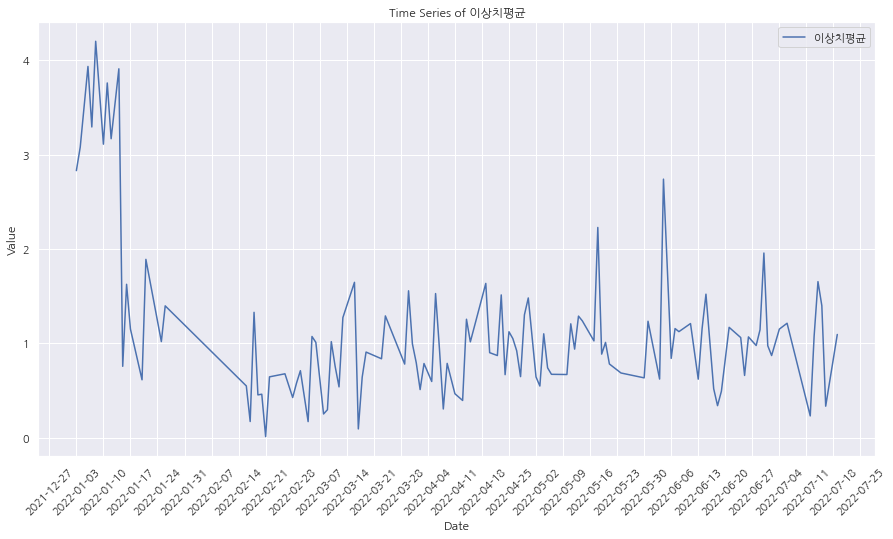

In [29]:
#시계열 그래프 그리기 (주 단위로 표시)
plt.plot(data.index, data['이상치평균'], label='이상치평균')
plt.title('Time Series of 이상치평균')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.MO, interval=1))
plt.show()

In [30]:
#품질 데이터 로드
df_q = pd.read_excel(file_q)

In [31]:
#데이터 로드 확인
df_q

,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981
...,...,...,...,...,...,...,...
131,147292,2022-07-14,열처리,열처리 염욕_1,43765,12,43777
132,147546,2022-07-15,열처리,열처리 염욕_1,59957,16,59973
133,147982,2022-07-18,열처리,열처리 염욕_1,40981,12,40993
134,147996,2022-07-18,열처리,열처리 염욕_1,30239,9,30248


In [32]:
#불량률 = 불량수량/총수량*100
df_q['불량률']=round(df_q['불량수량']/df_q['총수량']*100,3)
df_q

,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량,불량률
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163,0.020
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902,0.033
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646,0.050
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743,0.017
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981,0.013
...,...,...,...,...,...,...,...,...
131,147292,2022-07-14,열처리,열처리 염욕_1,43765,12,43777,0.027
132,147546,2022-07-15,열처리,열처리 염욕_1,59957,16,59973,0.027
133,147982,2022-07-18,열처리,열처리 염욕_1,40981,12,40993,0.029
134,147996,2022-07-18,열처리,열처리 염욕_1,30239,9,30248,0.030


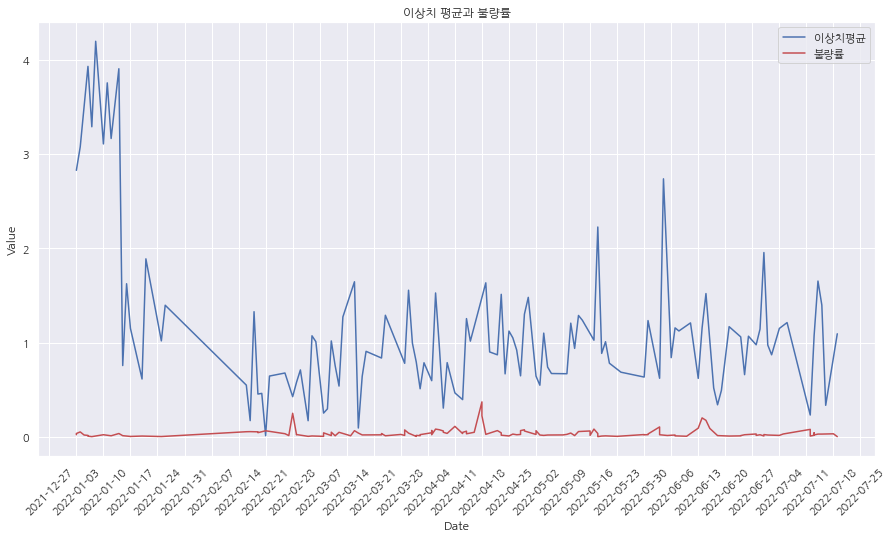

In [33]:
#이상치평균과 불량률 시계열 그래프 그리기
plt.plot(data.index, data['이상치평균'], label='이상치평균')
plt.plot(df_q['작업일'], df_q['불량률'], label='불량률', c='r')
plt.title('이상치 평균과 불량률')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.MO, interval=1))
plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller

#시계열 그래프의 정상성 체크

result = adfuller(data['이상치평균'])
## 결과 출력
print('Variable: 이상치평균')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
print('Is Stationary:', result[1] < 0.05)

Variable: 이상치평균
ADF Statistic: -4.301189048944156
p-value: 0.0004421109720391214
Critical Values: {'1%': -3.4645146202692527, '5%': -2.8765564361715534, '10%': -2.5747745328940375}
Is Stationary: True


In [35]:
import pmdarima as pm
from pmdarima.arima import ndiffs
# ARIMA(p, d, q)에서의 차분(d차수)을 얼마나 해야하는 지를 나타낸다.
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}") # 결과

추정된 차수 d = 0


In [36]:
#최적의 p, q 값
## AIC가 낮을 수록 좋은 모델이다.
model = pm.auto_arima(
            y=data, 
            d=0, 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=670.544, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=285.300, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=504.861, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=270.036, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=254.455, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=255.570, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=255.611, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=253.911, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=436.393, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=252.574, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=314.876, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.982, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=253.862, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=342.965, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253.1

In [37]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -121.287
Date:                Thu, 02 Nov 2023   AIC                            252.574
Time:                        16:27:23   BIC                            269.015
Sample:                    01-03-2022   HQIC                           259.229
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0440      0.031      1.429      0.153      -0.016       0.104
ar.L1          0.9659      0.018     54.877      0.000       0.931       1.000
ma.L1         -0.4295      0.090     -4.768      0.0

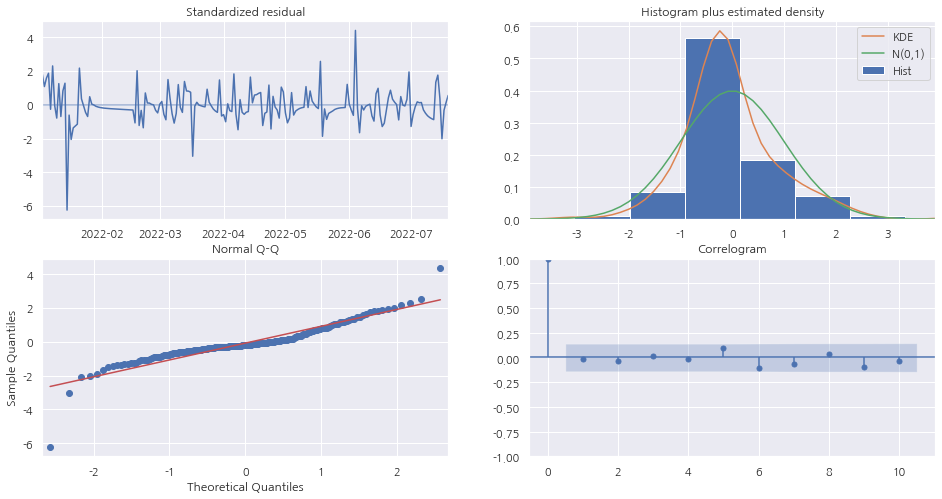

In [38]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [39]:
#예측을 위해 기존의 데이터를 train과 test를 9:1비율로 나누어준다.
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [40]:
from statsmodels.tsa.arima_model import ARIMA

model_fit = pm.auto_arima(
    	    y=train_data, 
 	        d=n_diffs , 
            start_p=0, max_p=2, 
            start_q=0, max_q=2, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=610.129, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=260.030, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=460.999, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=242.956, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=231.413, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=230.522, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=231.167, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=400.083, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=231.948, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.421, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=319.349, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=246.345, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=229.895, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=229.698, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=407.9

In [41]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
         for idx, row in data.iterrows():
            new_ob=0
            for value in row:
                new_ob=value   
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [42]:
# Forecast 
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

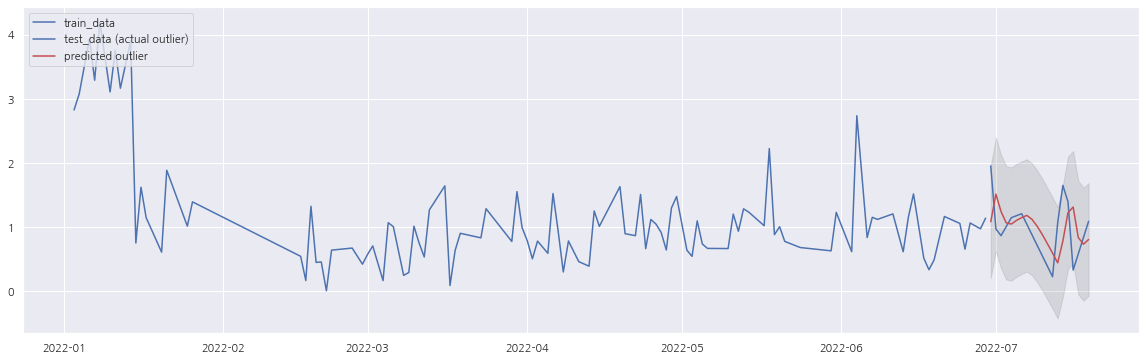

In [43]:
# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual outlier)')
plt.plot(fc, c='r',label='predicted outlier')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
#지표
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

MSE:  2.096552957345085
MAE:  1.0246961859443418
RMSE:  1.4479478434477828


In [45]:
#데이터가 없는 날짜(미래) 예측
date_index = pd.date_range(start = "2022-07-19", end = "2022-08-10", freq='D')
fc2, upper2, lower2 = forecast(len(date_index), model_fit, date_index)
print('동향') 
print(fc2.tail())

# fc2, conf = forecast_n_step(model_fit, len(date_list))
lower_series2 = pd.Series(lower2, index=date_index)  # 예측결과의 하한 바운드
upper_series2 = pd.Series(upper2, index=date_index)  # 예측결과의 상한 바운드

동향
2022-08-06    1.123108
2022-08-07    1.128781
2022-08-08    1.133638
2022-08-09    1.138798
2022-08-10    1.143180
Freq: D, dtype: float64


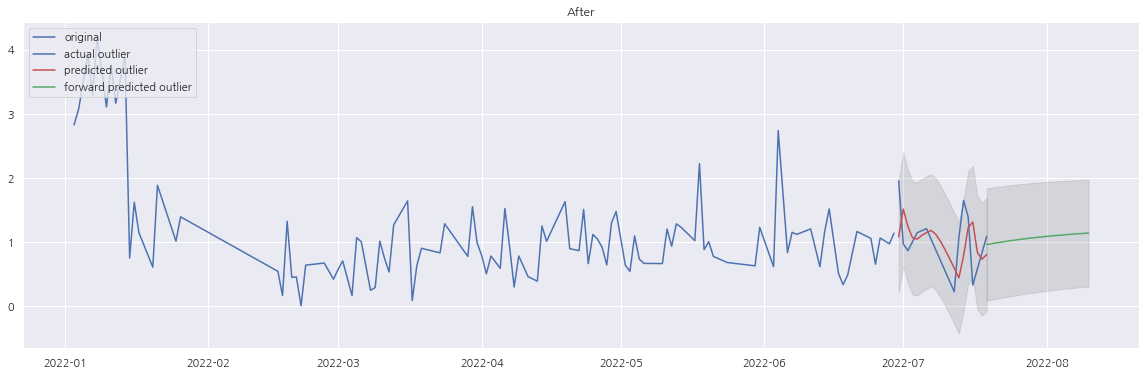

In [46]:
# plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='original')
plt.plot(test_data, c='b', label='actual outlier')
plt.plot(fc, c='r',label='predicted outlier')
plt.plot(fc2, c='g',label='forward predicted outlier')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.title('After')
plt.legend(loc='upper left')
plt.show()